<a href="https://colab.research.google.com/github/YuvanBharathi13/USFB-Time-Series-Analaysis/blob/main/USFB_timeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
end_date = datetime.today()
print(end_date)

2025-09-08 05:32:58.555840


In [3]:
start_date = end_date - timedelta(days=2*365)
print(start_date)

2023-09-09 05:32:58.555840


In [4]:
df = yf.download('UJJIVANSFB.NS',start=start_date,end=end_date)

/tmp/ipython-input-771749527.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('UJJIVANSFB.NS',start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS,UJJIVANSFB.NS
Date,,,,,
2023-09-11,48.394909,49.651919,48.056484,48.830029,20671719
2023-09-12,46.847820,49.410186,46.702779,48.926720,19211871
2023-09-13,47.911442,48.153175,45.929234,46.896165,11116500
2023-09-14,47.476322,48.926719,47.234589,48.153175,11856028
2023-09-15,47.669708,48.201520,46.847818,47.814749,11929205


In [6]:
df.to_csv('UjjivanSFB_d2d_final.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-09-11 to 2025-09-05
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Close, UJJIVANSFB.NS)   491 non-null    float64
 1   (High, UJJIVANSFB.NS)    491 non-null    float64
 2   (Low, UJJIVANSFB.NS)     491 non-null    float64
 3   (Open, UJJIVANSFB.NS)    491 non-null    float64
 4   (Volume, UJJIVANSFB.NS)  491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [8]:
df.shape

(491, 5)

In [9]:
df_USFB = pd.read_csv('/content/UjjivanSFB_d2d_final.csv')
df_USFB.head()

,Date,Day Close,Day High,Day Low,Open Price,Volume
0,2023-09-11,48.394909,49.651919,48.056484,48.830029,20671719
1,2023-09-12,46.847820,49.410186,46.702779,48.926720,19211871
2,2023-09-13,47.911442,48.153175,45.929234,46.896165,11116500
3,2023-09-14,47.476322,48.926719,47.234589,48.153175,11856028
4,2023-09-15,47.669708,48.201520,46.847818,47.814749,11929205


In [11]:
usfb = df_USFB.loc[:,['Date','Day Close']]
usfb.head()

,Date,Day Close
0,2023-09-11,48.394909
1,2023-09-12,46.847820
2,2023-09-13,47.911442
3,2023-09-14,47.476322
4,2023-09-15,47.669708


In [24]:
usfb['Date'] = pd.to_datetime(usfb['Date'])
usfb = usfb.set_index('Date')
usfb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2023-09-11 to 2025-09-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Day Close  491 non-null    float64
dtypes: float64(1)
memory usage: 7.7 KB


Text(0, 0.5, 'Price')

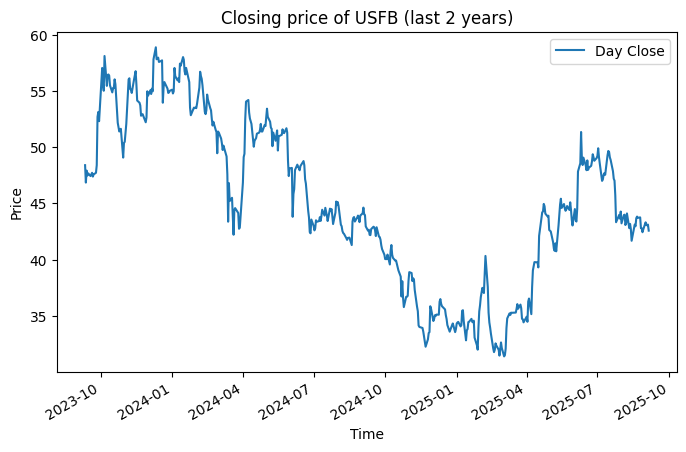

In [41]:
usfb.plot(figsize=(8,5))
plt.title("Closing price of USFB (last 2 years)")
plt.xlabel('Time')
plt.ylabel('Price')


In [29]:
usfb.shape

(491, 1)

In [30]:
time = usfb.index.to_numpy()
price = usfb['Day Close'].to_numpy()

## Splitting Data

In [33]:
train_size = int(0.8*len(usfb))
test_size = len(usfb)-train_size
train_size,test_size

(392, 99)

In [34]:
X_train = time[:train_size]
X_test = time[train_size:]
y_train = price[:train_size]
y_test = price[train_size:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392,), (99,), (392,), (99,))

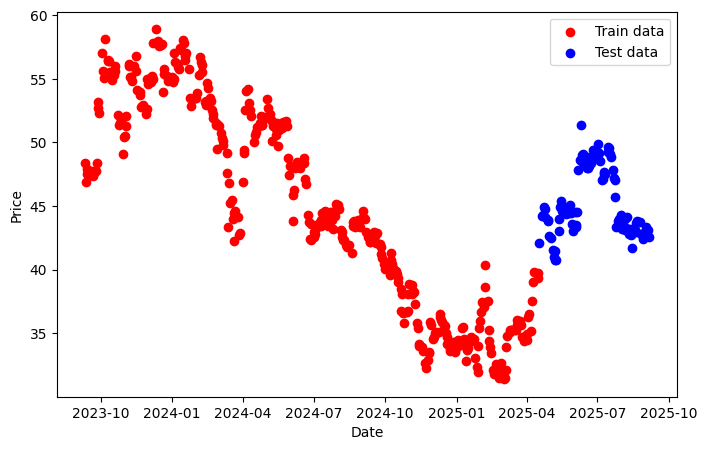

In [40]:
plt.figure(figsize=(8,5))
plt.scatter(X_train,y_train,color='red',label="Train data")
plt.scatter(X_test,y_test,color='blue',label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend();